<a href="https://colab.research.google.com/github/ugurtalas/SezgiselOtimizasyonDersNotlari/blob/main/Ga_Gezginsatici.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

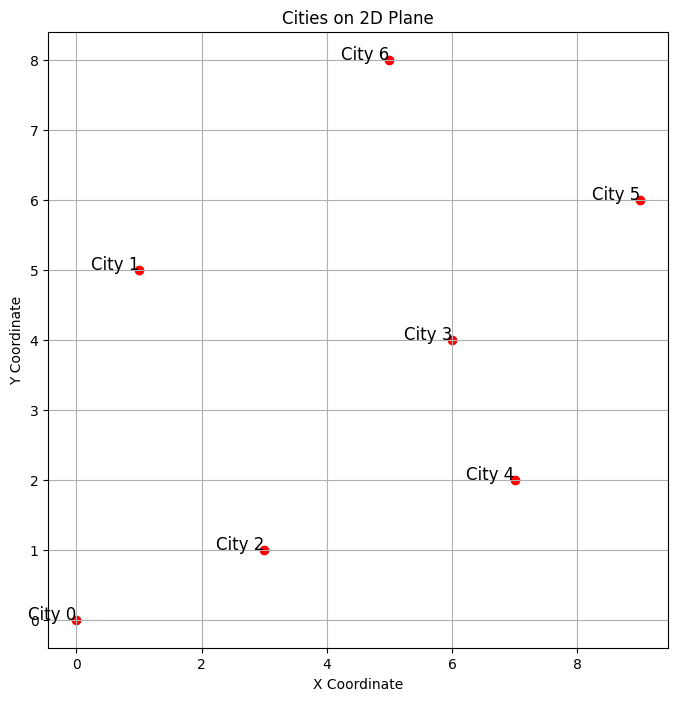


--- Generation 1 ---

Current Population (sorted by fitness):
 1. Route: [3, 0, 2, 1, 6, 5, 4], Fitness: 31.03
 2. Route: [3, 4, 1, 0, 2, 5, 6], Fitness: 33.61
 3. Route: [4, 3, 0, 1, 2, 6, 5], Fitness: 35.24
 4. Route: [2, 4, 0, 3, 5, 6, 1], Fitness: 36.16
 5. Route: [4, 3, 1, 6, 0, 2, 5], Fitness: 37.21
 6. Route: [6, 3, 5, 1, 0, 4, 2], Fitness: 39.57
 7. Route: [1, 6, 4, 3, 2, 5, 0], Fitness: 41.53
 8. Route: [1, 4, 6, 2, 0, 3, 5], Fitness: 42.35
 9. Route: [2, 3, 5, 1, 4, 0, 6], Fitness: 46.61
 10. Route: [2, 6, 0, 5, 3, 1, 4], Fitness: 47.07

 Elit Bireyler:
 1. Route: [3, 0, 2, 1, 6, 5, 4], Fitness: 31.03
 2. Route: [3, 4, 1, 0, 2, 5, 6], Fitness: 33.61
Turnuvaya Girenler: [[2, 4, 0, 3, 5, 6, 1], [1, 6, 4, 3, 2, 5, 0], [4, 3, 1, 6, 0, 2, 5]]
Kazanan: [2, 4, 0, 3, 5, 6, 1]
Turnuvaya Girenler: [[6, 3, 5, 1, 0, 4, 2], [4, 3, 1, 6, 0, 2, 5], [3, 0, 2, 1, 6, 5, 4]]
Kazanan: [3, 0, 2, 1, 6, 5, 4]

Parents selected for crossover:
 Parent 1: [2, 4, 0, 3, 5, 6, 1]
 Parent 2: [3, 0, 2, 1,

In [2]:
import random
import math
import matplotlib.pyplot as plt

# Şehirlerin koordinatları
cities = [(0, 0), (1, 5), (3, 1), (6, 4), (7, 2), (9, 6), (5, 8)]

# Şehirleri ekrana çizdirme fonksiyonu
def plot_cities(cities):
    x_coords = [city[0] for city in cities]
    y_coords = [city[1] for city in cities]
    plt.figure(figsize=(8, 8))
    plt.scatter(x_coords, y_coords, color='red')
    for i, (x, y) in enumerate(cities):
        plt.text(x, y, f"City {i}", fontsize=12, ha='right')
    plt.title('Cities on 2D Plane')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.show()

# Şehirler arasındaki mesafeyi hesaplayan fonksiyon
def calculate_distance(city1, city2):
    return math.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)

# Fitness fonksiyonu (toplam rota mesafesi)
def fitness(route):
    total_distance = 0
    for i in range(len(route)):
        city1 = cities[route[i]]
        city2 = cities[route[(i + 1) % len(route)]]
        total_distance += calculate_distance(city1, city2)
    return 1 / total_distance

# Rastgele popülasyon oluştur
def create_population(pop_size):
    population = []
    for _ in range(pop_size):
        route = list(range(len(cities)))
        random.shuffle(route)
        population.append(route)
    return population

# Turnuva Seçimi (Tournament Selection)
def tournament_selection(population, tournament_size=3):
    tournament = random.sample(population, tournament_size)
    print(f"Turnuvaya Girenler: {tournament}")
    best_individual = max(tournament, key=fitness)
    print(f"Kazanan: {best_individual}")
    return best_individual

# Two-Point Crossover (Çift Noktalı Çaprazlama)
def two_point_crossover(parent1, parent2):
    # Rastgele iki kesim noktası seç
    start, end = sorted(random.sample(range(len(parent1)), 2))
    print(f"Start: {start}, End: {end}")
    # Çocukların oluşturulması
    child1 = parent1[:start] + parent2[start:end] + parent1[end:]
    child2 = parent2[:start] + parent1[start:end] + parent2[end:]

    return child1, child2


# One-Point Crossover (Çift Noktalı Çaprazlama)
def one_point_crossover(parent1, parent2):
    # Çocukların oluşturulması
    child1 = parent1[:3]  + parent2[3:]
    child2 = parent2[:3]  + parent1[3:]

    return child1, child2


# Displacement Mutation (Yer Değiştirme Mutasyonu)
def displacement_mutation(route, mutation_rate=0.9):
    if  random.random() < mutation_rate:
        # Rastgele bir alt küme seç
        start, end = sorted(random.sample(range(len(route)), 2))

        segment = route[start:end]

        # Segmenti rotadan çıkar
        remaining_route = route[:start] + route[end:]

        # Yeni bir pozisyona yerleştir
        insert_position =0# random.randint(0, len(remaining_route))
        mutated_route = remaining_route[:insert_position] + segment + remaining_route[insert_position:]
        print(f" Mutasyon : {route}, ->: {mutated_route}, start {start}, end {end}")
        return mutated_route, True  # Mutasyon gerçekleştiyse True döndür
    print("Mutasyon gerçekleşmedi.")
    return route, False  # Mutasyon gerçekleşmediyse False döndür

# Genetik Algoritma
def genetic_algorithm(pop_size=10, generations=3, mutation_rate= 0.1, tournament_size=3, elitism_count=2):
    population = create_population(pop_size)
    plot_cities(cities)

    for generation in range(generations):
        print(f"\n--- Generation {generation+1} ---")
        population = sorted(population, key=lambda route: fitness(route), reverse=True)

        # Popülasyonu yazdır
        print("\nCurrent Population (sorted by fitness):")
        for idx, route in enumerate(population):
            print(f" {idx+1}. Route: {route}, Fitness: {1 / fitness(route):.2f}")

         # En iyi elit bireyleri koru
        new_population = population[:elitism_count]
        print("\n Elit Bireyler:")
        for idx, route in enumerate(new_population):
          print(f" {idx+1}. Route: {route}, Fitness: {1 / fitness(route):.2f}")

        while len(new_population) < pop_size:
            # Ebeveyn seçimi (Turnuva Seçimi)
            parent1 = tournament_selection(population, tournament_size)
            parent2 = tournament_selection(population, tournament_size)

            print(f"\nParents selected for crossover:")
            print(f" Parent 1: {parent1}")
            print(f" Parent 2: {parent2}")

            # Çaprazlama (Two-Point Crossover)
            child1, child2 = one_point_crossover(parent1, parent2)
            print(f" Children produced: {child1}, {child2}")

            # Mutasyon
            child1, mutated1 = displacement_mutation(child1, mutation_rate)
            child2, mutated2 = displacement_mutation(child2, mutation_rate)
            if mutated1:
                print(f" Displacement Mutation applied to child 1: {child1}")
            if mutated2:
                print(f" Displacement Mutation applied to child 2: {child2}")

            new_population.append(child1)
            if len(new_population) < pop_size:
                new_population.append(child2)

        population = new_population

    best_route = max(population, key=fitness)
    best_distance = 1 / fitness(best_route)
    return best_route, best_distance

# Genetik algoritmayı çalıştır
best_route, best_distance = genetic_algorithm()

print(f"\n--- Final Best Solution ---")
print(f"Best Route: {best_route}, Distance: {best_distance:.2f} units")